In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer, QuantileTransformer, StandardScaler
from sklearn.pipeline import make_pipeline

In [ ]:
red_wines = pd.read_csv('./../data/winequality-red.csv', delimiter = ';')
red_wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
red_wines.shape

(1599, 12)

In [4]:
red_wines.info() # keine nulle werte

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Remove duplicates weil fast nichts von 3,4 & 8 verloren wird:

In [5]:
vals_per_class = red_wines['quality'].value_counts()

In [6]:
red_wines.drop_duplicates(inplace = True)

In [7]:
new_vals_per_class = red_wines['quality'].value_counts()

vals_per_class - new_vals_per_class

quality
5    104
6    103
7     32
4      0
8      1
3      0
Name: count, dtype: int64

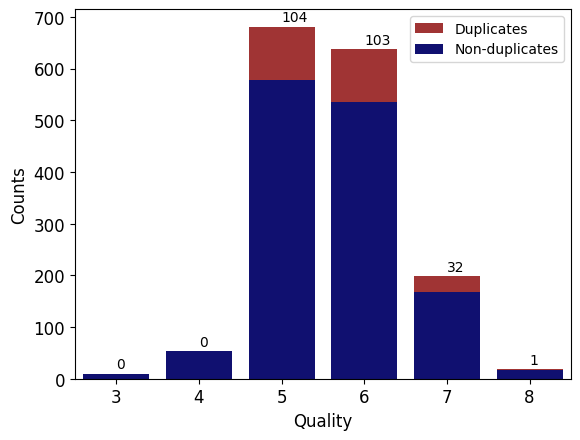

In [8]:
fig, ax = plt.subplots()
ax = sns.barplot(vals_per_class, ax=ax, color='firebrick', label='Duplicates')
ax = sns.barplot(new_vals_per_class, ax=ax, color='navy', label='Non-duplicates')
for i in range(len(vals_per_class.index)):
    ax.text(vals_per_class.index[i] -3, vals_per_class.values[i]+10 , str(vals_per_class.values[i] - new_vals_per_class.values[i]))
ax.legend(fontsize=10)
ax.tick_params(labelsize=12)
ax.set_xlabel('Quality', fontsize=12)
ax.set_ylabel('Counts', fontsize=12)
#fig.savefig('drop_duplicates.png', dpi=300)
plt.show()

In [9]:
red_wines.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


## Stratified Train/Test Split

In [10]:


X = red_wines.iloc[:, :-1].to_numpy()
y = red_wines.iloc[:, -1].to_numpy()
feature_names = red_wines.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [ ]:
red_wines_train = pd.DataFrame(np.hstack((X_train, y_train[:, None])), columns = feature_names)
df = pd.melt(red_wines_train, red_wines_train.columns[-1], red_wines_train.columns[:-1])

g = sns.FacetGrid(df, col="variable", hue="quality", col_wrap=4, sharex=False, sharey=False,  palette="deep")
g.map(sns.kdeplot, "value", label='quality', fill=True)
plt.legend()

In [ ]:
display(red_wines_train.corr())
sns.heatmap(red_wines_train.corr(), vmin=-1, vmax=1, cmap='RdBu')

In [ ]:
red_wines_train[['volatile acidity', 'sulphates', 'alcohol', 'quality']].describe()

In [ ]:
display(red_wines_train[['volatile acidity', 'sulphates', 'alcohol', 'quality']].corr())
sns.heatmap(red_wines_train[['volatile acidity', 'sulphates', 'alcohol', 'quality']].corr(), vmin=-1, vmax=1, cmap='RdBu')

## Transform and Scale

In [ ]:


pscaler = PowerTransformer(method='yeo-johnson', standardize=True, copy=True)
qscaler = QuantileTransformer(n_quantiles=100, output_distribution='normal',ignore_implicit_zeros=False, subsample=100, random_state=None, copy=True)

X_train_pscl = pscaler.fit_transform(X_train)
X_train_qscl = qscaler.fit_transform(X_train)


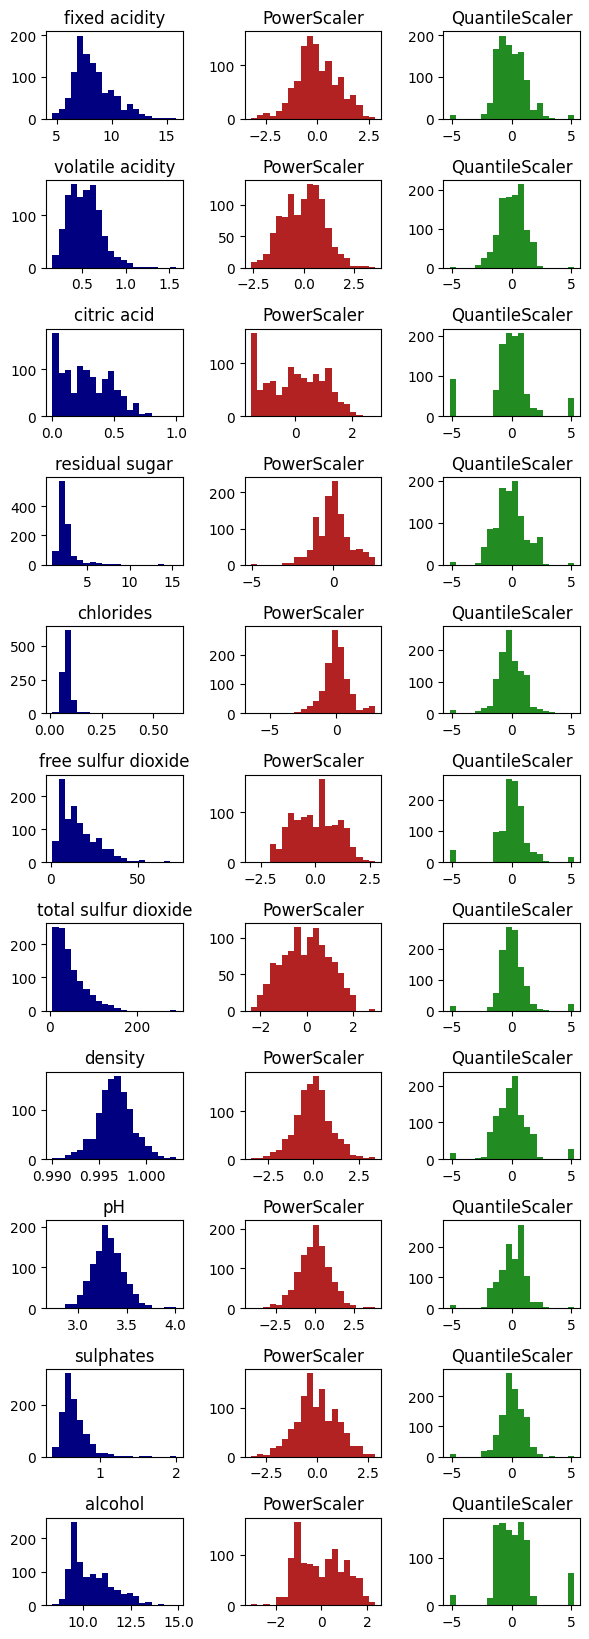

In [34]:
n_cols = 3
n_rows = 11

fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*2, n_rows*1.5))

for i in range(n_rows):
    ax[i, 0].hist(X_train[:,i], color='navy', bins=20)
    ax[i, 1].hist(X_train_pscl[:,i], color='firebrick', bins=20)
    ax[i, 2].hist(X_train_qscl[:,i], color='forestgreen', bins=20)

    ax[i, 0].set_title(feature_names[i])
    ax[i, 1].set_title('PowerScaler')
    ax[i, 2].set_title('QuantileScaler')

  #  ax[i, 1].set_title(f'lambda = {np.round(scaler.lambdas_[i], 2)}')

plt.tight_layout()
plt.show()

## Add Features

In [35]:
class CustomFeatureTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
    # Initialize any parameters you need here
        pass

    def fit(self, X, y=None):
    # Fit the transformer to the data (e.g. compute any necessary statistics)
        return self

    def transform(self, X):
# Create the custom features
# Balance refers to the relationship between the four essential elements of wine:
# tannin, acidity, alcohol and sugar.
# Je süßer der Wein desto mehr Säure verträgt er
        acids = X[:,:2].sum(axis=1)
        acids_per_sugar = acids / X[:,3]
        acids_per_alc = acids / X[:, 10]
        alc_per_sugar = X[:, 10] / X[:,3]
        sulf_per_sugar = X[:,6] / X[:, 3]

        new_f = np.column_stack((acids_per_sugar, acids_per_alc, alc_per_sugar, sulf_per_sugar))
        #new_f_inv = 1 / new_f

        X = np.hstack((X, new_f)) #new_f_inv

# um mehr Zucker muss mehr schwefel hinzugefügt werden um Fermentation zu stoppen

# Zucker wird zu Alkohol

        return X

In [ ]:
pscaler = PowerTransformer(method='yeo-johnson', standardize=True, copy=True)


In [36]:
cus_t = CustomFeatureTransformer()
X_new = cus_t.fit_transform(X_train_pscl)

In [ ]:
X_newpd = pd.DataFrame(np.hstack((X_new, y_train[:,None])), columns=list(red_wines.columns)[:-1] + ['acid_sugar', 'acid_alc', 'alc_sugar', 'sulf_sugar', 'quality'])


,acid_sugar,acid_alc,alc_sugar,sulf_sugar,quality
acid_sugar,1.000000,0.142793,-0.424695,-0.083979,0.081463
acid_alc,0.142793,1.000000,0.005735,-0.019472,0.038816
alc_sugar,-0.424695,0.005735,1.000000,-0.157332,-0.113203
sulf_sugar,-0.083979,-0.019472,-0.157332,1.000000,0.005909
quality,0.081463,0.038816,-0.113203,0.005909,1.000000


<Axes: >

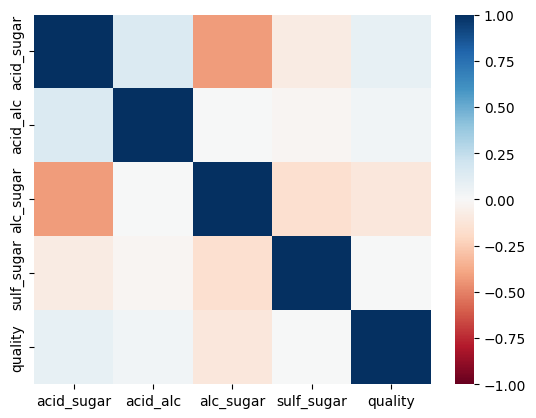

In [39]:
display(X_newpd[['acid_sugar', 'acid_alc', 'alc_sugar', 'sulf_sugar', 'quality']].corr())
sns.heatmap(X_newpd[['acid_sugar', 'acid_alc', 'alc_sugar', 'sulf_sugar', 'quality']].corr(), vmin=-1, vmax=1, cmap='RdBu')

<Axes: ylabel='Count'>

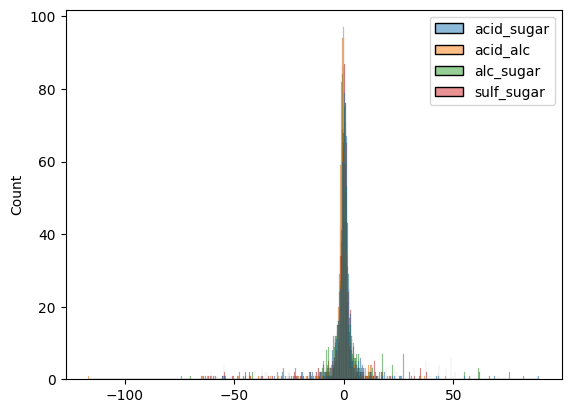

In [45]:
sns.histplot(X_newpd[['acid_sugar', 'acid_alc', 'alc_sugar', 'sulf_sugar']])

## Make Pipeline

In [43]:
preprocessing_pipe = make_pipeline(PowerTransformer(method='yeo-johnson', standardize=True, copy=True),
                                CustomFeatureTransformer(),
                                StandardScaler())

In [48]:
X_train_processed = preprocessing_pipe.fit_transform(X_train)

In [ ]:
# save transformed X_train
np.savetxt('./../data/X_train_processed.csv', X_train_processed, delimiter=',')

In [50]:
# save pipeline
with open('preprocessing_pipeline.pkl', 'wb') as p_file:
    pickle.dump(preprocessing_pipe, p_file)